<a href="https://colab.research.google.com/github/Neel7317/Time_Series/blob/main/AR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autoregressive (AR)** modeling is one of the techniques used for time-series analysis. An autoregressive model is a time-series model that describes how a particular variable’s past values influence its current value. In other words, an AR model attempts to predict the next value in a series by incorporating the most recent past values and using them as input data. Autoregressive models are based on the idea that past events can help us predict future events. For example, if we know that the stock market has been going up for the past few days, we might expect it to continue going up in the future. Or, if we know that there has been a lot of rain lately, we might expect more rain in the future.

---

We will use statsmodels.tsa package to load ar_model.AR class which is used to train the univariate autoregressive (AR) model of order p. Note that statsmodels.tsa contains model classes and functions that are useful for time series analysis. Basic models include univariate autoregressive models (AR), vector autoregressive models (VAR), and univariate autoregressive moving average models (ARMA). The following are some of the key steps which needed to be done for training the AR model:



*   Plot the time-series
*   Check the stationarity
*   Determine the parameter p or order of the AR model
*   Train the model



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA,ARMA
from datetime import datetime, timedelta,time
register_matplotlib_converters()

**Ice-creame production data**

In [2]:
def parser(s):
  return datetime.strptime(s,'%Y-%m-%d')

In [4]:
production_ice_cream=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)

<ipython-input-4-f1bae9e05a3b>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  production_ice_cream=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)


In [5]:
production_ice_cream.rename('production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [6]:
#infer the frequencey of the data
production_ice_cream=production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [8]:
#just get data from 2010
start_data=pd.to_datetime('2010-01-01')
production_ice_cream=production_ice_cream[start_data:]


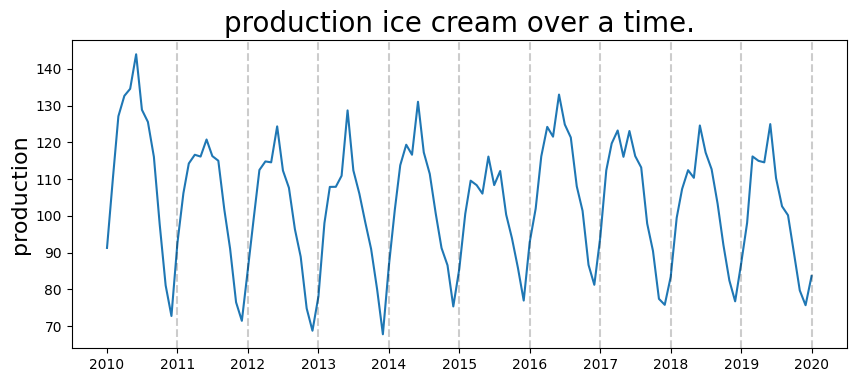

In [12]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('production ice cream over a time.',fontsize=20)
plt.ylabel('production',fontsize=16)
for year in range(2011,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)


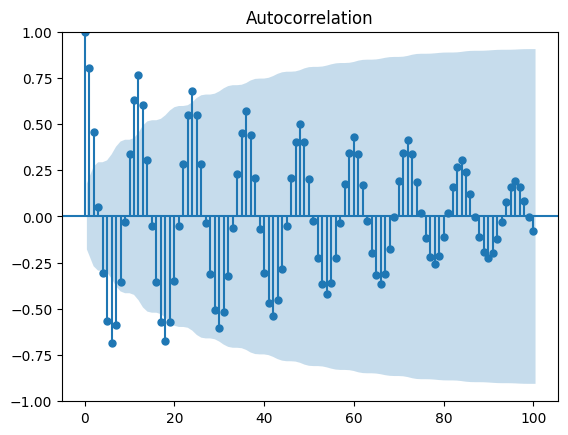

In [14]:
acf_plot=plot_acf(production_ice_cream,lags=100)

# Based on decaying ACF, we are likely to dealing with autoregressive process

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


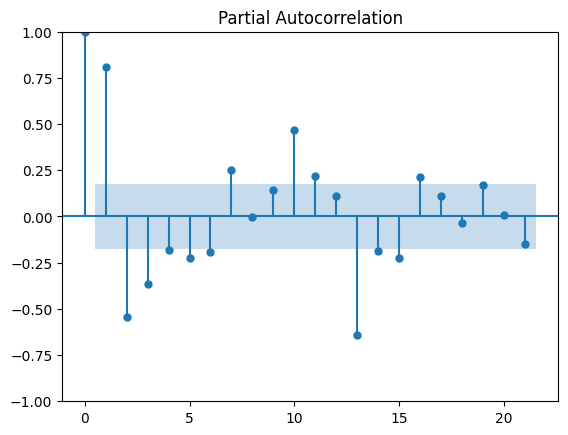

In [15]:
pacf_plot=plot_pacf(production_ice_cream)

Based on PACF, we should start with autoregrssive model with lags 1,2,3

In [16]:
#get training and testing data..
train_end=datetime(2018,12,1)
test_end=datetime(2019,12,1)

train_data=production_ice_cream[:train_end]
test_data=production_ice_cream[train_end+timedelta(days=1):test_end]

# FIT the AR model

In [18]:
model=ARMA(train_data, order=(3,0)) # order=(AR,MA)

NotImplementedError: ignored

In [19]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=3)

In [23]:

model_fit=ar_model.fit()


In [24]:
#model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                  108
Model:                     AutoReg(3)   Log Likelihood                -361.899
Method:               Conditional MLE   S.D. of innovations              7.597
Date:                Sun, 28 May 2023   AIC                            733.798
Time:                        10:13:37   BIC                            747.068
Sample:                    04-01-2010   HQIC                           739.175
                         - 12-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.7865      5.596      7.468      0.000      30.819      52.754
production.L1     1.0277      0.089     11.527      0.000       0.853       1.202
production.L2    -0.0323      0.134     

In [25]:
#get prediction on start and end date
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [27]:
#get prediction and model residuals..
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions

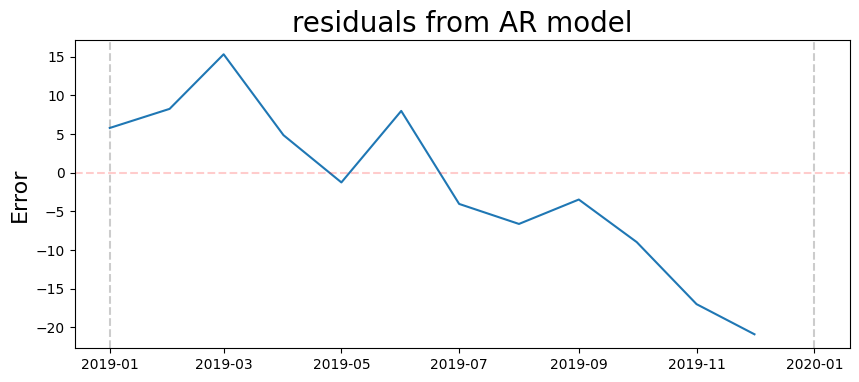

In [28]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('residuals from AR model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

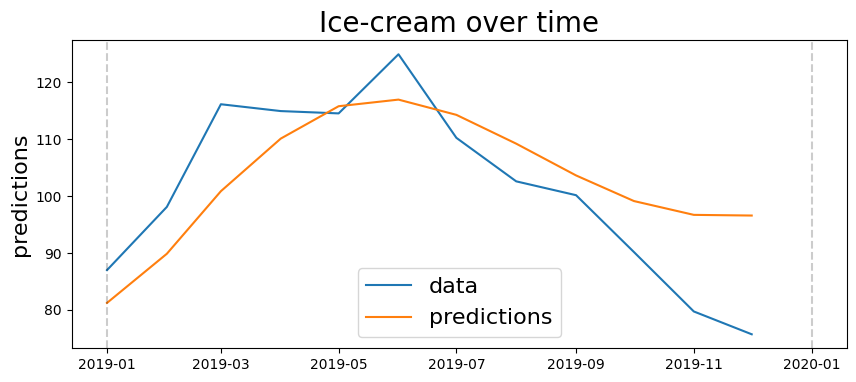

In [30]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)

plt.legend(('data','predictions'),fontsize=16)

plt.title('Ice-cream over time',fontsize=20)
plt.ylabel('predictions',fontsize=16)

for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

In [32]:
print('Mean absolute percent error', round(np.mean(abs(residuals/test_data)),4))

Mean absolute percent error 0.0936


In [33]:
print('Mean squred error',np.sqrt(np.mean(residuals**2)))

Mean squred error 10.414527193836017


# Rolling Forcast Origine

**Idea : Predict one month in advance each time**

Train on month 1,2, and predict for month 3

Train on month 1,2,3 and predict for month 4

Train on month 1,2,3,4 and predict for month 5
.
.
.

Average all predictions ⁉

In [39]:
# Create The model
Prediction_rolling=pd.Series()
for end_date in test_data.index:
  train_data=production_ice_cream[:end_date - timedelta(days=1)]
  model= AutoReg(train_data,lags=3)
  model_fit=model.fit()
  pred=model_fit.predict(end_date)
  Prediction_rolling.loc[end_date]=pred.loc[end_date]


<ipython-input-39-ea6291eb7f81>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Prediction_rolling=pd.Series()


ValueError: ignored